In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pickle

In [2]:
# ucitavanje grafa
with open("graph.pkl", "rb") as f:
    G = pickle.load(f)

In [3]:
node_to_ego_df = pd.read_csv("node_to_ego.csv", header=None, names=['node', 'ego'], skiprows=1)  
node_to_ego = node_to_ego_df.groupby('node')['ego'].apply(list).to_dict()
# konvertovanje kljuceva i vrednosti u node_to_ego u int
node_to_ego = {int(node): [int(ego) for ego in egos] for node, egos in node_to_ego.items()}

ego_to_index_df = pd.read_csv("ego_to_index.csv", index_col=0)
ego_to_index = ego_to_index_df.to_dict(orient='index')
ego_to_index = {int(ego_id): int(index['index']) for ego_id, index in ego_to_index.items()}

In [4]:
colors = [
    '#FFD700',  # zlatna 
    '#FF6F61',  # svetlo crvena
    '#F7CAC9',  # svetlo roza
    '#DD4124',  # tamno crvena
    '#955251',  # braon
    '#6B5B95',  # tamno ljubicasta    
    '#92A8D1',  # svetlo plava  
    '#B565A7',  # ljubicasta   
    '#88B04B',  # svetlo zelena
    '#45B8AC'   # svetlo teal  
]

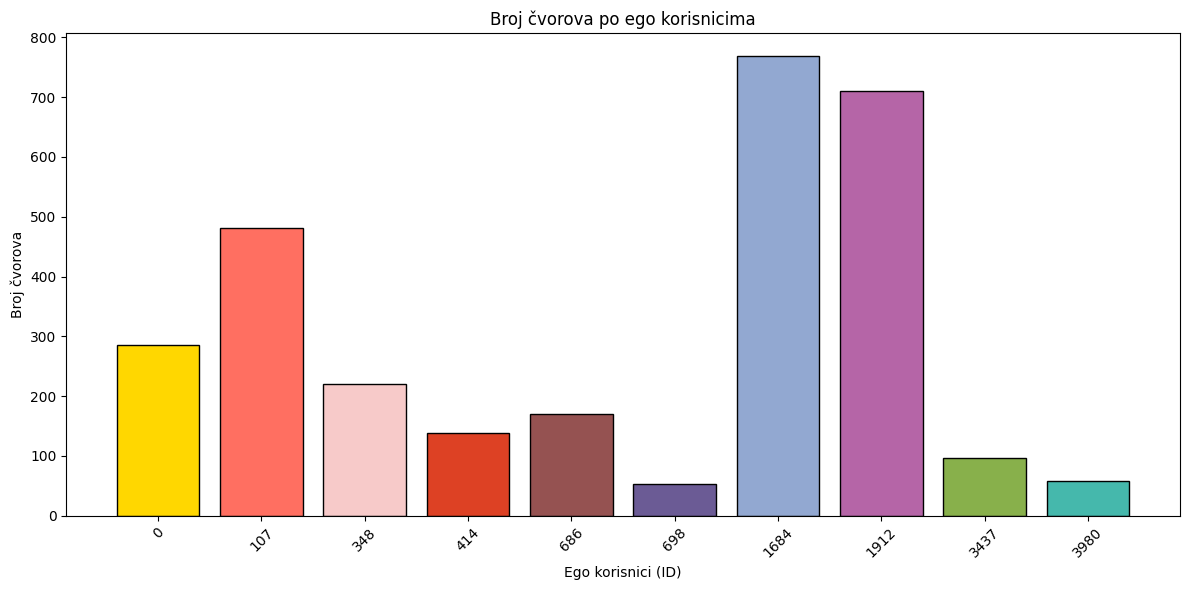

In [5]:
# racunamo koliko cvorova pripada svakoj ego mreži
ego_sizes = {ego_id: 0 for ego_id in ego_to_index.keys()}
for egos in node_to_ego.values():
    for ego_id in egos:
        ego_sizes[ego_id] += 1

# crtanje
plt.figure(figsize=(12, 6))
positions = range(len(ego_sizes))

plt.bar(positions, ego_sizes.values(), color=colors, edgecolor='black')
plt.xticks(positions, list(ego_sizes.keys()), rotation=45)

plt.xlabel('Ego korisnici (ID)')
plt.ylabel('Broj čvorova')
plt.title('Broj čvorova po ego korisnicima')
plt.tight_layout()
plt.show()

In [6]:
ego_sizes

{0: 286,
 107: 481,
 348: 220,
 414: 139,
 686: 170,
 698: 54,
 1684: 769,
 1912: 710,
 3437: 97,
 3980: 58}

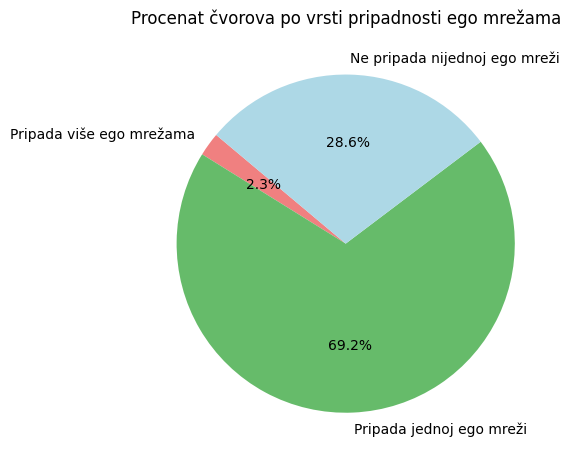

In [7]:
# brojanje cvorova koji pripadaju više ego mrežama
multi_ego_nodes = sum(1 for egos in node_to_ego.values() if len(egos) > 1)

# brojanje bvorova koji pripadaju samo jednoj ego mreži
single_ego_nodes = sum(1 for egos in node_to_ego.values() if len(egos) == 1)

# brojanje cvorova koji ne pripadaju nijednoj ego mreži
no_ego_nodes = len(G.nodes) - len(node_to_ego)

# Vizualizacija broja čvorova koji pripadaju više ego mrežama
plt.figure(figsize=(12, 6))

# pie chart za čvorove koji pripadaju više ego mrežama i samo jednoj ili nijeddnoj
plt.subplot(1, 2, 1)
plt.pie([multi_ego_nodes, single_ego_nodes, no_ego_nodes], 
        labels=['Pripada više ego mrežama', 'Pripada jednoj ego mreži', 'Ne pripada nijednoj ego mreži'], 
        autopct='%1.1f%%', startangle=140, colors=['lightcoral', '#66BB6A', 'lightblue'])
plt.title('Procenat čvorova po vrsti pripadnosti ego mrežama')

plt.show()


In [8]:
ego_colors = {ego_id: colors[i] for i, ego_id in enumerate(ego_to_index.keys())}

# Postavite boje za čvorove
node_colors = []
for node in G.nodes:
    if node in node_to_ego:
        egos = node_to_ego[node]
        ego_id = int(egos[0])
        color = ego_colors[ego_id]  
    else:
        color = 'lightgray'  # Ako čvor nema ego mrežu
    node_colors.append(color)

# Pripremi boje i veličine za čvorove
node_color_list = [node_colors[node] for node in G.nodes]
node_sizes = [100] * len(G.nodes)  

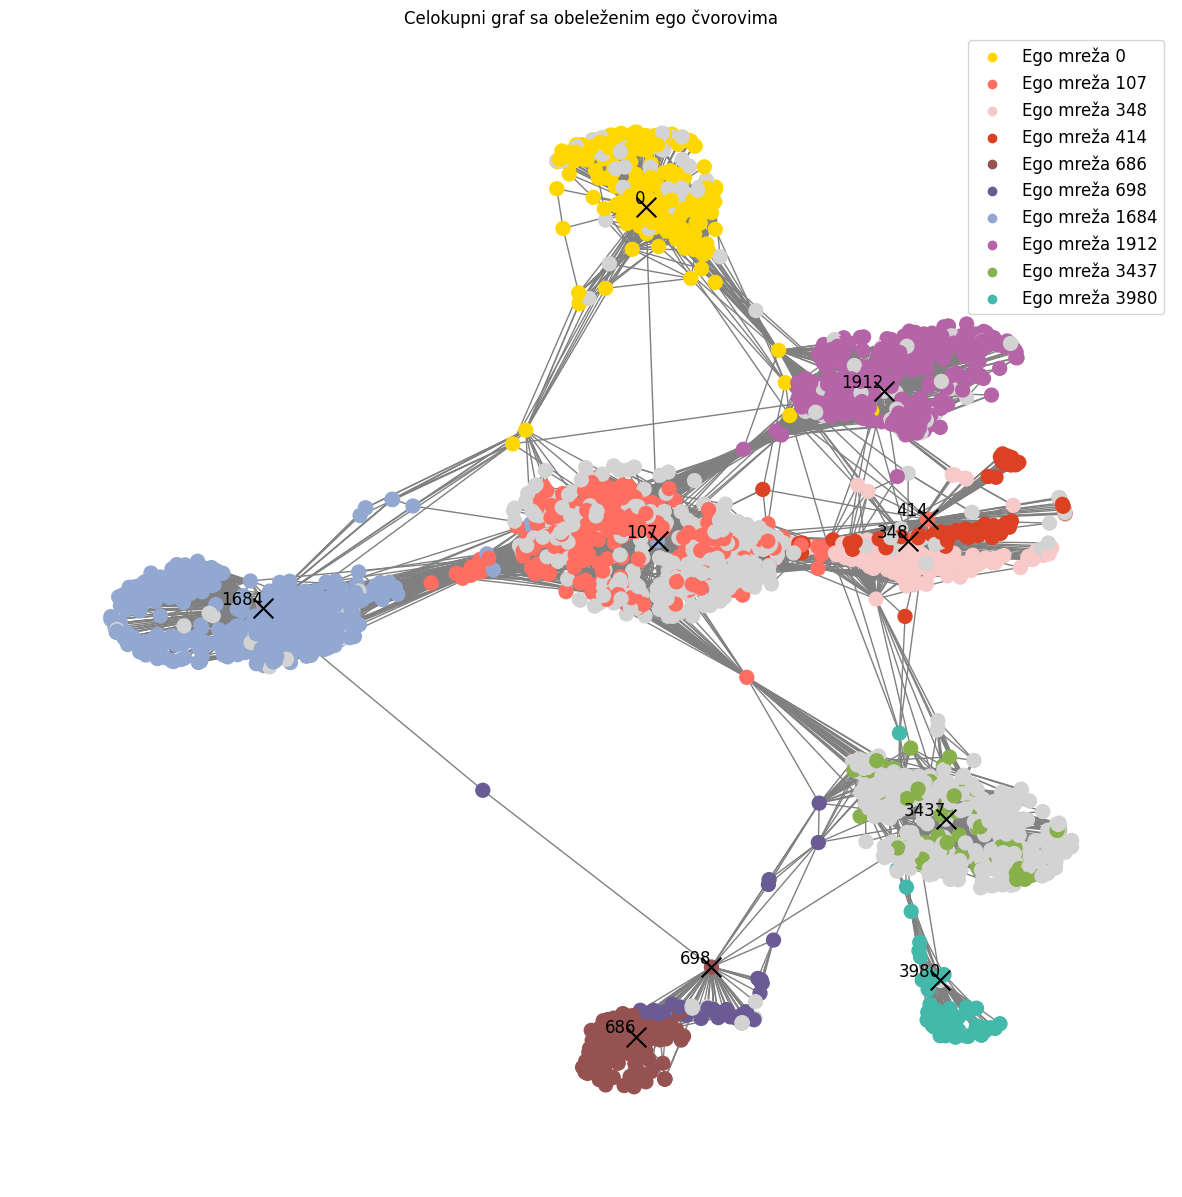

In [9]:
# Pripremite sve što je potrebno za crtanje
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)  # Layout sa određenim seed-om

# Pripremite legendu boja za ego mreže
for ego_id, color in ego_colors.items():
    plt.scatter([], [], c=color, label=f'Ego mreža {ego_id}')  # Dodavanje praznog scattera za legendu

# Bojenje čvorova prema ego mrežama
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=node_sizes, edge_color='gray', node_shape='o')

# Naglasite ego čvorove sa većim markerima i različitim stilom
ego_nodes = list(ego_to_index.keys())  # Lista ego čvorova
nx.draw_networkx_nodes(G, pos, nodelist=ego_nodes, node_color='black', node_size=200, node_shape='x')

# Dodavanje oznaka za ego čvorove
for ego_node in ego_nodes:
    x, y = pos[ego_node]  # Pozicija ego čvora
    plt.text(x, y, f'{ego_node}', fontsize=12, ha='right', va='bottom', color='black')  # Dodavanje oznake

# Dodavanje legende
plt.legend(scatterpoints=1, loc='best', fontsize=12)

plt.title("Celokupni graf sa obeleženim ego čvorovima")
plt.show()